# Modelo

## Instalación y Carga de librerias

In [39]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Regresión con los datos transformados
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from lazypredict.Supervised import LazyRegressor
from sklearn.inspection import permutation_importance


## Carga de Base de datos transformada y la etiqueta

In [82]:
# Carga de base de datos 
path = '../data/' # ruta del dataset
X_transformed = pd.read_csv(path + 'spotify-2023-limpio-rdt.csv', sep=',', encoding='latin-1') # cargamos el dataset limpio y transformado
y = pd.read_csv(path + 'spotify-2023-limpio-rdt-y.csv', sep=',', encoding='latin-1') # cargamos la variable objetivo

In [83]:
X_transformed.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [84]:
print("\n🔹 Datos transformados:")
X_transformed.head()


🔹 Datos transformados:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.00,0.00,2.00,2023.00,7.00,14.00,553.00,147.00,43.00,263.00,...,125.00,0.09,0.29,80.00,89.00,83.00,31.00,0.00,8.00,4.00
1,0.00,0.00,1.00,2023.00,3.00,23.00,1474.00,48.00,48.00,126.00,...,92.00,0.13,0.55,71.00,61.00,74.00,7.00,0.00,10.00,4.00
2,0.00,0.01,1.00,2023.00,6.00,30.00,1397.00,113.00,94.00,207.00,...,138.00,0.30,0.05,51.00,32.00,53.00,17.00,0.00,31.00,6.00
3,0.00,0.02,1.00,2019.00,8.00,23.00,7858.00,100.00,116.00,207.00,...,170.00,0.39,0.05,55.00,58.00,72.00,11.00,0.00,11.00,15.00
4,0.01,0.05,1.00,2023.00,5.00,18.00,3133.00,50.00,84.00,133.00,...,144.00,0.39,0.80,65.00,23.00,80.00,14.00,63.00,11.00,6.00


## Distribucíon de datos para entrenamiento y validación

In [85]:
# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [86]:
# Aplicar LazyPredict para regresión 🚀
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=r2_score)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Mostrar las columnas disponibles
print(models.columns)



  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:08<00:00,  5.08it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2397
[LightGBM] [Info] Number of data points in the train set: 652, number of used features: 23
[LightGBM] [Info] Start training from score 458769196,831288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [87]:
#  Mostrar resultados ordenados por R-Squared
print("🔹 Comparación de Modelos de Regresión:")
print(models.sort_values(by="R-Squared", ascending=False))

🔹 Comparación de Modelos de Regresión:
                               Adjusted R-Squared  R-Squared         RMSE  \
Model                                                                       
HistGradientBoostingRegressor                0.86       0.88 195014322.96   
LGBMRegressor                                0.84       0.87 202203235.64   
GradientBoostingRegressor                    0.84       0.86 204036283.96   
RandomForestRegressor                        0.84       0.86 207932073.38   
ExtraTreesRegressor                          0.82       0.85 217853891.36   
BaggingRegressor                             0.81       0.84 224619376.86   
XGBRegressor                                 0.81       0.83 225003837.10   
AdaBoostRegressor                            0.73       0.77 267819634.16   
RidgeCV                                      0.72       0.76 272053893.54   
SGDRegressor                                 0.72       0.76 272239161.61   
Ridge                                

In [88]:
# Mostrar resultados ordenados por R-Squared (mayor es mejor)
print("\n🔹 Comparación de Modelos de Regresión (ordenado por R-Squared):")
print(models.sort_values(by="R-Squared", ascending=False)[:8])

# Mostrar resultados ordenados por RMSE (menor es mejor)
print("\n🔹 Comparación de Modelos de Regresión (ordenado por RMSE):")
print(models.sort_values(by="RMSE", ascending=True)[:8])

# Mostrar resultados ordenados por Adjusted R-Squared (menor es mejor)
print("\n🔹 Comparación de Modelos de Regresión (ordenado por Adjusted R-Squared):")
print(models.sort_values(by="Adjusted R-Squared", ascending=False)[:8])



🔹 Comparación de Modelos de Regresión (ordenado por R-Squared):
                               Adjusted R-Squared  R-Squared         RMSE  \
Model                                                                       
HistGradientBoostingRegressor                0.86       0.88 195014322.96   
LGBMRegressor                                0.84       0.87 202203235.64   
GradientBoostingRegressor                    0.84       0.86 204036283.96   
RandomForestRegressor                        0.84       0.86 207932073.38   
ExtraTreesRegressor                          0.82       0.85 217853891.36   
BaggingRegressor                             0.81       0.84 224619376.86   
XGBRegressor                                 0.81       0.83 225003837.10   
AdaBoostRegressor                            0.73       0.77 267819634.16   

                               Time Taken  r2_score  
Model                                                
HistGradientBoostingRegressor        0.33      0.88  
LG

## Selección del modelo

In [89]:
models.shape

(42, 5)

In [90]:
models_sorted = models.sort_values(by="R-Squared", ascending=True)

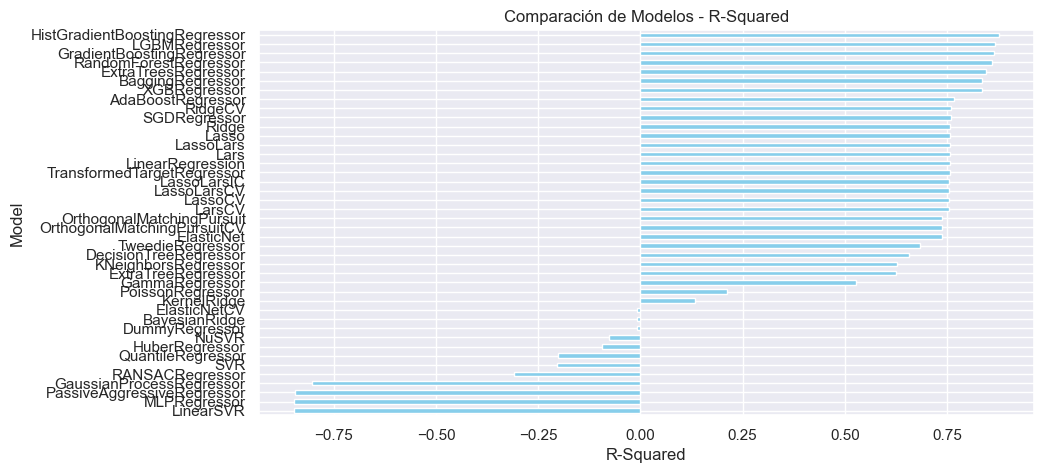

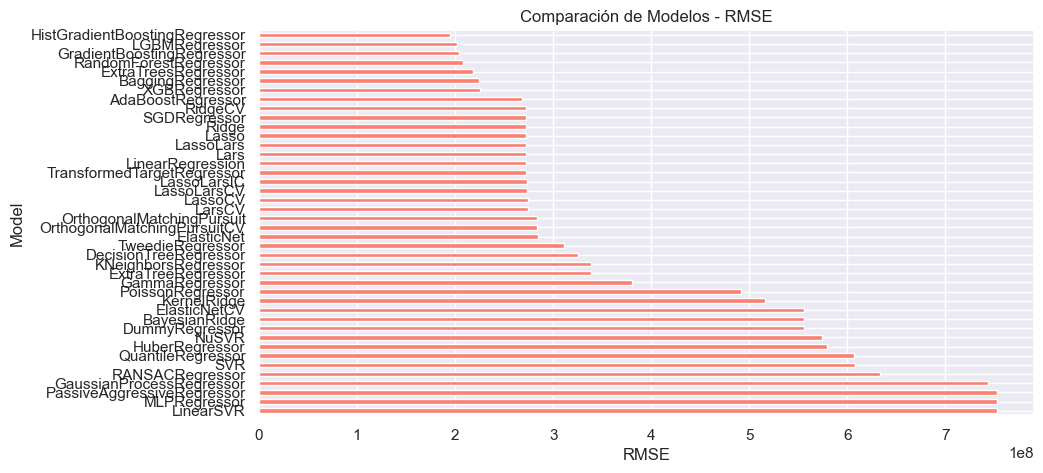

✅ Mejor modelo según R-Squared: HistGradientBoostingRegressor
✅ Mejor modelo según RMSE: HistGradientBoostingRegressor


In [91]:
# 5️⃣ Gráfica comparativa de R-Squared
plt.figure(figsize=(10,5))
models_sorted['R-Squared'].plot(kind='barh', color='skyblue')
plt.title('Comparación de Modelos - R-Squared')
plt.xlabel('R-Squared')
plt.show()

# 6️⃣ Gráfica comparativa de RMSE
models_sorted_rmse = models.sort_values(by="RMSE", ascending=False)
plt.figure(figsize=(10,5))
models_sorted_rmse['RMSE'].plot(kind='barh', color='salmon')
plt.title('Comparación de Modelos - RMSE')
plt.xlabel('RMSE')
plt.show()

# 7️⃣ Mejor modelo según R-Squared
best_model_r2 = models_sorted.iloc[-1].name
print(f"✅ Mejor modelo según R-Squared: {best_model_r2}")

# 8️⃣ Mejor modelo según RMSE
best_model_rmse = models_sorted_rmse.iloc[-1].name
print(f"✅ Mejor modelo según RMSE: {best_model_rmse}")

## Selección final del mejor modelo

In [92]:
# Mejor por menor RMSE
mejor_por_rmse = models.loc[models['RMSE'].idxmin()]
print(f"\n🏅 Mejor modelo por menor RMSE: {mejor_por_rmse.name}")
print(mejor_por_rmse)

# Mejor por mayor R-Squared
mejor_por_r2 = models.loc[models['R-Squared'].idxmax()]
print(f"\n🏅 Mejor modelo por mayor R-Squared: {mejor_por_r2.name}")
print(mejor_por_r2)



🏅 Mejor modelo por menor RMSE: HistGradientBoostingRegressor
Adjusted R-Squared           0.86
R-Squared                    0.88
RMSE                 195014322.96
Time Taken                   0.33
r2_score                     0.88
Name: HistGradientBoostingRegressor, dtype: float64

🏅 Mejor modelo por mayor R-Squared: HistGradientBoostingRegressor
Adjusted R-Squared           0.86
R-Squared                    0.88
RMSE                 195014322.96
Time Taken                   0.33
r2_score                     0.88
Name: HistGradientBoostingRegressor, dtype: float64


In [93]:
# Extraer el mejor modelo basado en el R²
best_model = models.iloc[0]  # El primer modelo es el mejor porque la tabla está ordenada por R²

# Mostrar el mejor modelo y sus métricas
print("\n🔹 **Mejor modelo:**", models.index[0])
print(best_model)


🔹 **Mejor modelo:** HistGradientBoostingRegressor
Adjusted R-Squared           0.86
R-Squared                    0.88
RMSE                 195014322.96
Time Taken                   0.33
r2_score                     0.88
Name: HistGradientBoostingRegressor, dtype: float64


In [94]:
# Crear y entrenar el modelo
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


In [95]:
# Métricas
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f"🔹 HistGradientBoostingRegressor")
print(f"Adjusted R-Squared: {adjusted_r2:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


🔹 HistGradientBoostingRegressor
Adjusted R-Squared: 0.86
R-Squared: 0.88
RMSE: 195014322.96
MAE: 123708454.78


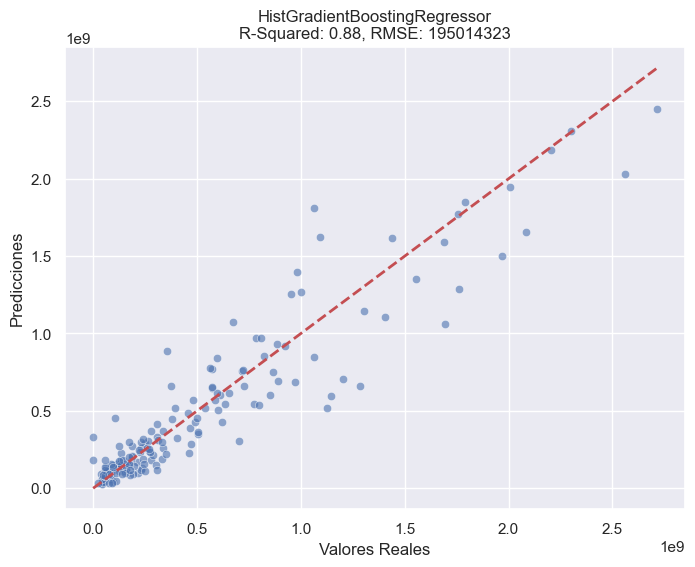

In [96]:
# Visualización de resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'HistGradientBoostingRegressor\nR-Squared: {r2:.2f}, RMSE: {rmse:.0f}')
plt.show()


In [97]:
model  # Importancia de las variables

HistGradientBoostingRegressor()

In [98]:
# Calcular la importancia por permutación
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Crear DataFrame
df_importancias = pd.DataFrame({
    'Característica': X_test.columns,
    'Importancia': result.importances_mean
}).sort_values(by='Importancia', ascending=False)

print(df_importancias)


          Característica  Importancia
6   in_spotify_playlists         1.09
3          released_year         0.10
8     in_apple_playlists         0.03
7      in_spotify_charts         0.01
16        danceability_%         0.01
12      in_shazam_charts         0.01
5           released_day         0.01
4         released_month         0.00
10   in_deezer_playlists         0.00
14                   key         0.00
19        acousticness_%         0.00
18              energy_%         0.00
13                   bpm         0.00
9        in_apple_charts         0.00
0             track_name         0.00
2           artist_count        -0.00
17             valence_%        -0.00
21            liveness_%        -0.00
20    instrumentalness_%        -0.00
22         speechiness_%        -0.00
15                  mode        -0.00
11      in_deezer_charts        -0.00
1         artist(s)_name        -0.00


## Relevancia de características del modelo

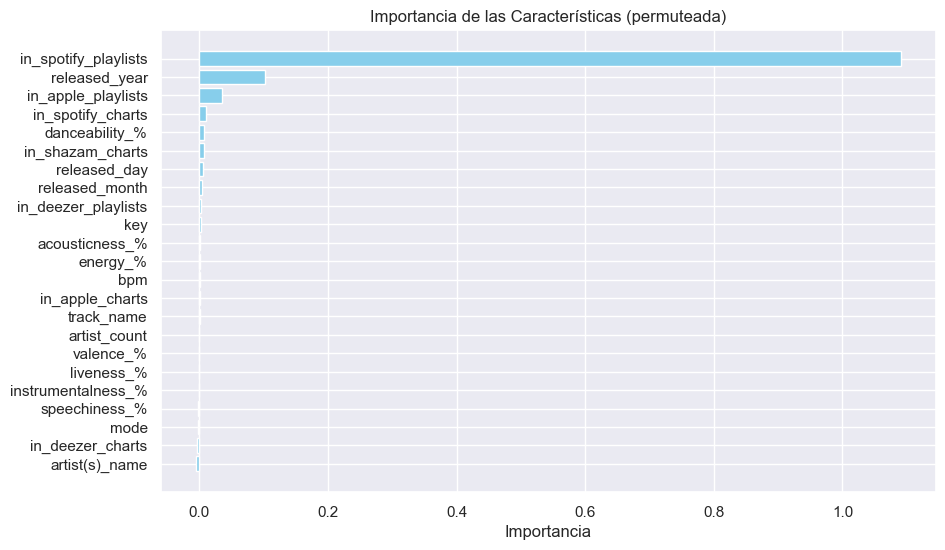

In [99]:
# Graficar
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Característica'], df_importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características (permuteada)')
plt.gca().invert_yaxis()
plt.show()


🔹 Top 5 Características más Importantes:
          Característica  Importancia
6   in_spotify_playlists         1.09
3          released_year         0.10
8     in_apple_playlists         0.03
7      in_spotify_charts         0.01
16        danceability_%         0.01


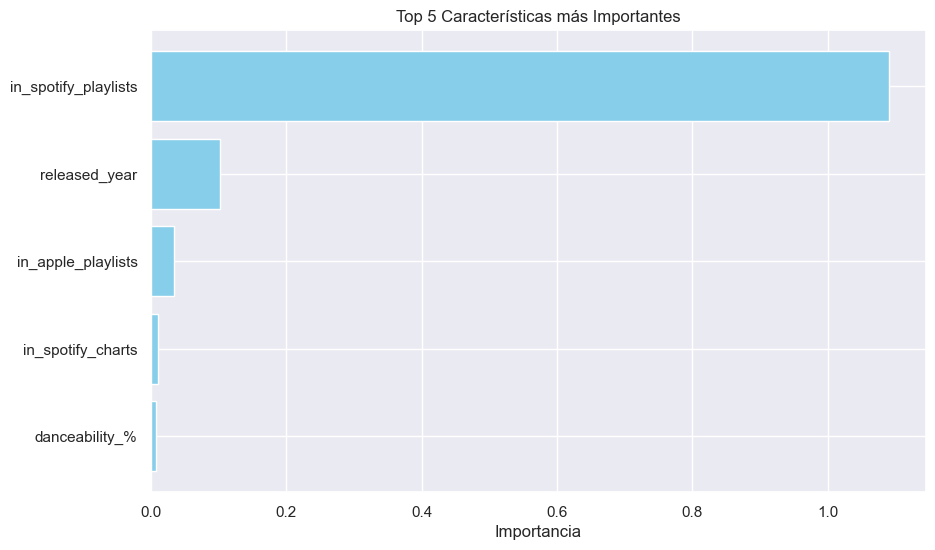

In [100]:
# Seleccionar las Top 5 características más importantes
top_5_importancias = df_importancias.head(5)

# Mostrar las Top 5 características
print("🔹 Top 5 Características más Importantes:")
print(top_5_importancias)

# Graficar las Top 5 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(top_5_importancias['Característica'], top_5_importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Top 5 Características más Importantes')
plt.gca().invert_yaxis()
plt.show()


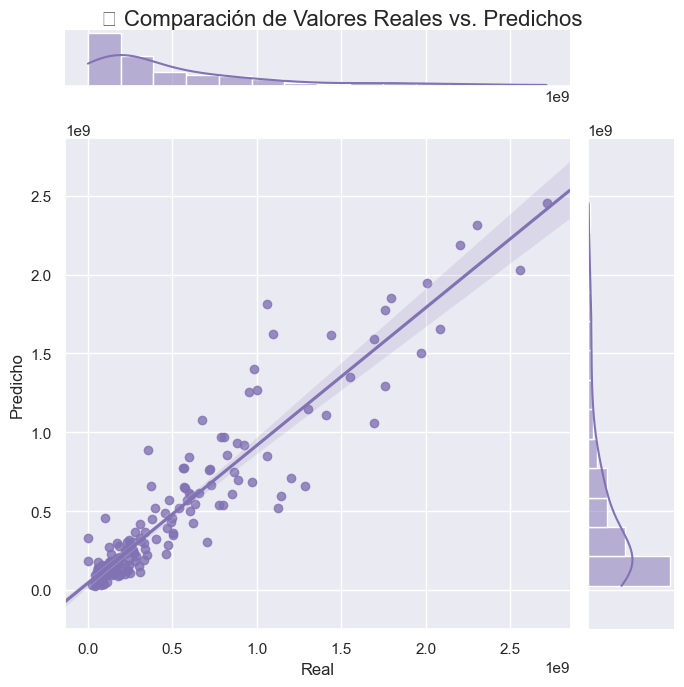

In [101]:
# Crear un DataFrame con las predicciones y los valores reales
df_resultados = pd.DataFrame({
    'Real': y_test.values.ravel(),
    'Predicho': y_pred
})

# Configurar el estilo
sns.set_theme(style="darkgrid")

# Graficar usando jointplot
g = sns.jointplot(x='Real', y='Predicho', data=df_resultados,
                  kind='reg',  # tipo de gráfico con regresión ajustada
                  truncate=False,
                  color="m",
                  height=7)

g.fig.suptitle('🔹 Comparación de Valores Reales vs. Predichos', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  # ajustar título
plt.show()


## Selección de características:

### Relevancia por modelo

In [102]:
# Carga de base de datos 
path = '../data/' # ruta del dataset
X_transformed = pd.read_csv(path + 'spotify-2023-limpio-rdt.csv', sep=',', encoding='latin-1') # cargamos el dataset limpio y transformado
y = pd.read_csv(path + 'spotify-2023-limpio-rdt-y.csv', sep=',', encoding='latin-1') # cargamos la variable objetivo

In [103]:
X_transformed_mod = X_transformed[top_5_importancias['Característica'].values.tolist()]

In [104]:
# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed_mod, y, test_size=0.2, random_state=42)

In [105]:
# Crear y entrenar el modelo
model_mod = HistGradientBoostingRegressor()
model_mod.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_mod.predict(X_test)


In [106]:
# Métricas
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f"🔹 HistGradientBoostingRegressor")
print(f"Adjusted R-Squared: {adjusted_r2:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


🔹 HistGradientBoostingRegressor
Adjusted R-Squared: 0.87
R-Squared: 0.87
RMSE: 196390426.73
MAE: 131875233.53


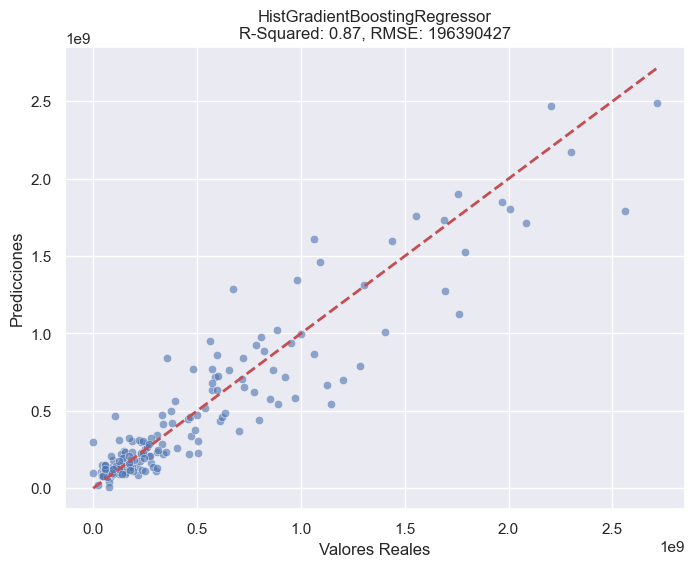

In [107]:
# Visualización de resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'HistGradientBoostingRegressor\nR-Squared: {r2:.2f}, RMSE: {rmse:.0f}')
plt.show()


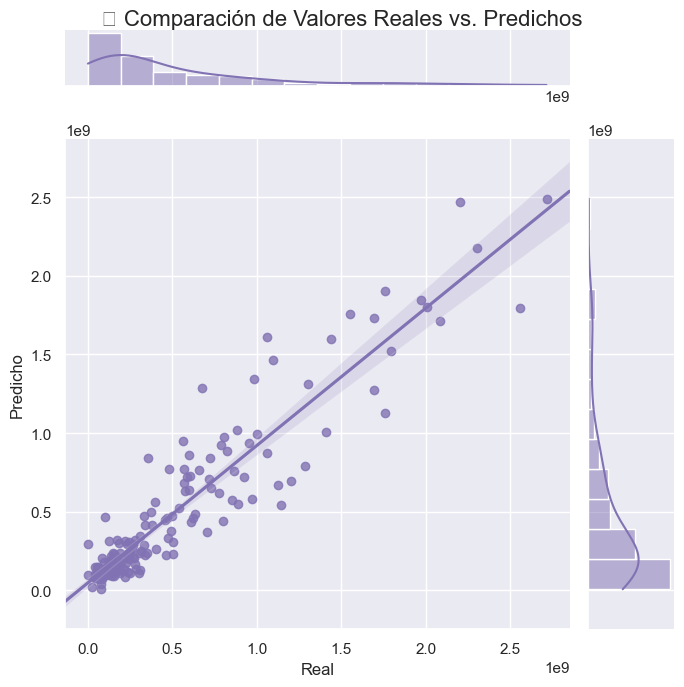

In [108]:
# Crear un DataFrame con las predicciones y los valores reales
df_resultados = pd.DataFrame({
    'Real': y_test.values.ravel(),
    'Predicho': y_pred
})

# Configurar el estilo
sns.set_theme(style="darkgrid")

# Graficar usando jointplot
g = sns.jointplot(x='Real', y='Predicho', data=df_resultados,
                  kind='reg',  # tipo de gráfico con regresión ajustada
                  truncate=False,
                  color="m",
                  height=7)

g.fig.suptitle('🔹 Comparación de Valores Reales vs. Predichos', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  # ajustar título
plt.show()


In [109]:
# Guardar el modelo entrenado
Modelo_final = model_mod

### Relevancia por modelo v2

In [111]:
X_transformed_mod = X_transformed[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']]

🔹 HistGradientBoostingRegressor
Adjusted R-Squared: 0.82
R-Squared: 0.82
RMSE: 235271322.38
MAE: 159168235.99


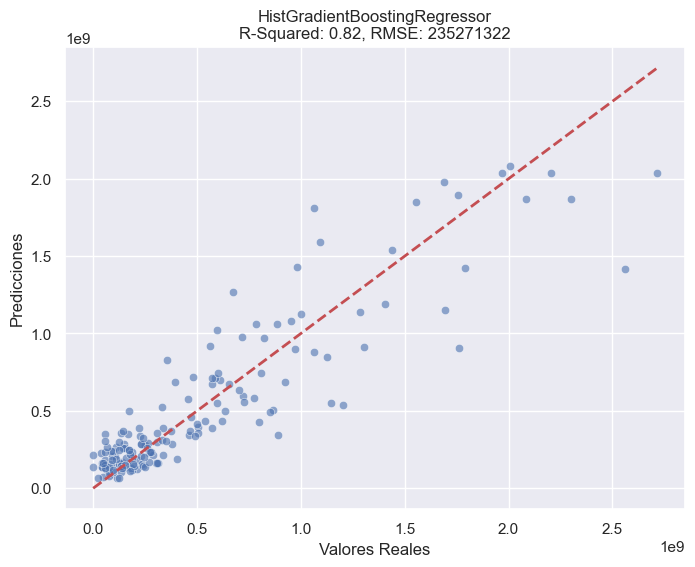

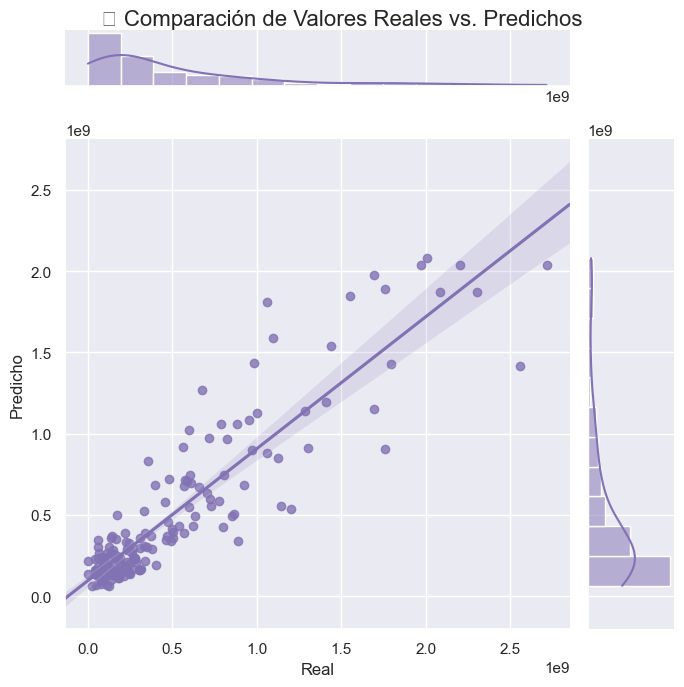

In [112]:
# Separar en entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X_transformed_mod, y, test_size=0.2, random_state=42)
# Crear y entrenar el modelo
model_mod = HistGradientBoostingRegressor()
model_mod.fit(X_train, y_train)
# Hacer predicciones
y_pred = model_mod.predict(X_test)
# Métricas
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
# Mostrar resultados
print(f"🔹 HistGradientBoostingRegressor")
print(f"Adjusted R-Squared: {adjusted_r2:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualización de resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'HistGradientBoostingRegressor\nR-Squared: {r2:.2f}, RMSE: {rmse:.0f}')
plt.show()

# Crear un DataFrame con las predicciones y los valores reales
df_resultados = pd.DataFrame({
    'Real': y_test.values.ravel(),
    'Predicho': y_pred
})
# Configurar el estilo
sns.set_theme(style="darkgrid")
# Graficar usando jointplot
g = sns.jointplot(x='Real', y='Predicho', data=df_resultados,
                  kind='reg',  # tipo de gráfico con regresión ajustada
                  truncate=False,
                  color="m",
                  height=7)
g.fig.suptitle('🔹 Comparación de Valores Reales vs. Predichos', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  # ajustar título
plt.show()

In [113]:
# Guardar el modelo entrenado
Modelo_final1 = model_mod

### Relevancia por características con mayor correlación

In [114]:
lista_carac_select = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
'in_deezer_playlists', 'in_deezer_charts', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']

🔹 HistGradientBoostingRegressor
Adjusted R-Squared: 0.80
R-Squared: 0.81
RMSE: 242213474.57
MAE: 158461111.13


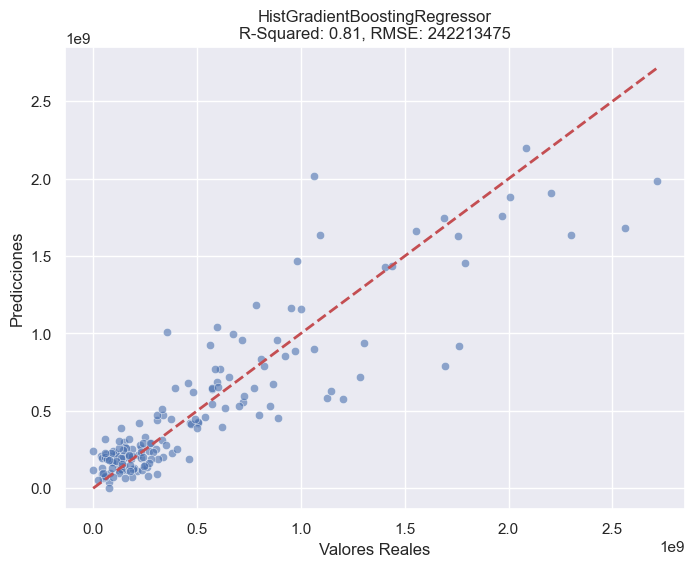

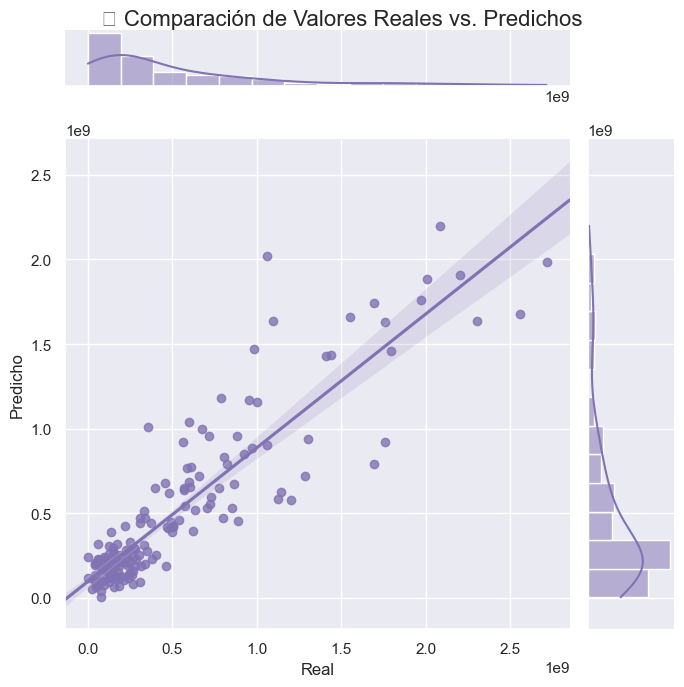

In [115]:
X_transformed_mod = X_transformed[lista_carac_select]
# Separar en entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X_transformed_mod, y, test_size=0.2, random_state=42)
# Crear y entrenar el modelo
model_mod = HistGradientBoostingRegressor()
model_mod.fit(X_train, y_train)
# Hacer predicciones
y_pred = model_mod.predict(X_test)
# Métricas
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
# Mostrar resultados
print(f"🔹 HistGradientBoostingRegressor")
print(f"Adjusted R-Squared: {adjusted_r2:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualización de resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'HistGradientBoostingRegressor\nR-Squared: {r2:.2f}, RMSE: {rmse:.0f}')
plt.show()

# Crear un DataFrame con las predicciones y los valores reales
df_resultados = pd.DataFrame({
    'Real': y_test.values.ravel(),
    'Predicho': y_pred
})
# Configurar el estilo
sns.set_theme(style="darkgrid")
# Graficar usando jointplot
g = sns.jointplot(x='Real', y='Predicho', data=df_resultados,
                  kind='reg',  # tipo de gráfico con regresión ajustada
                  truncate=False,
                  color="m",
                  height=7)
g.fig.suptitle('🔹 Comparación de Valores Reales vs. Predichos', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  # ajustar título
plt.show()


         Característica  Importancia
0  in_spotify_playlists         1.04
2    in_apple_playlists         0.08
1     in_spotify_charts         0.02
3       in_apple_charts         0.00
7             valence_%         0.00
8              energy_%         0.00
6        danceability_%         0.00
9        acousticness_%        -0.00
4   in_deezer_playlists        -0.00
5      in_deezer_charts        -0.00


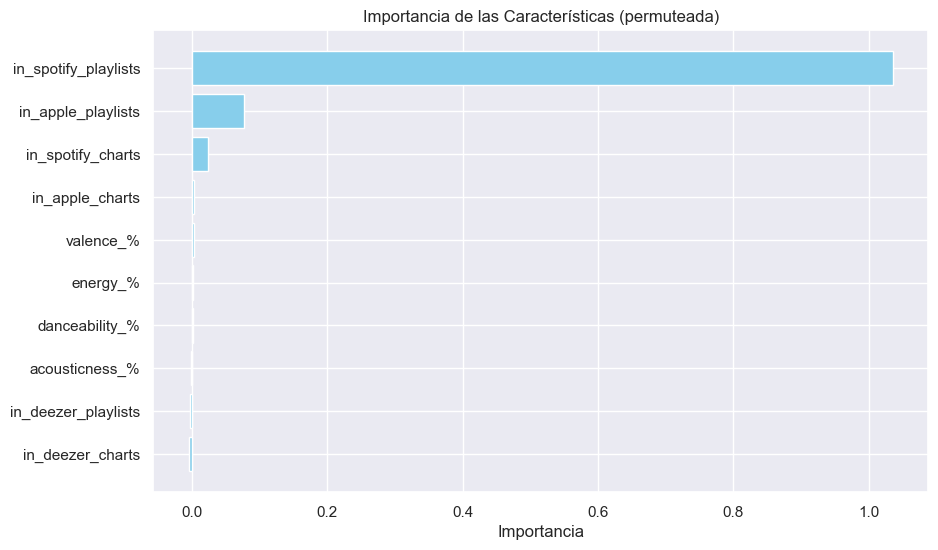

In [116]:
# Calcular la importancia por permutación
result = permutation_importance(model_mod, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Crear DataFrame
df_importancias = pd.DataFrame({
    'Característica': X_test.columns,
    'Importancia': result.importances_mean
}).sort_values(by='Importancia', ascending=False)

print(df_importancias)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Característica'], df_importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características (permuteada)')
plt.gca().invert_yaxis()
plt.show()


In [117]:
# Guardar el modelo entrenado
Modelo_final2 = model_mod

## Modelos seleccionado para guardar

In [110]:
joblib.dump(Modelo_final, path + "Modelo_HistGradientBoostingRegressor_spotify.pkl")

['../data/Modelo_HistGradientBoostingRegressor_spotify.pkl']